## Importing Libraries

In [163]:
import numpy as np

In [164]:
import pandas as pd

In [165]:
import matplotlib.pyplot as plt

In [166]:
import seaborn as sns

In [167]:
import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset

In [168]:
data = pd.read_csv("DATA with rain detector.csv")

In [169]:
data.head()

,Temperature,Humidity,RainDetector,PhotoDiode,SoilMoisture
0,21.0,72,1020,96,170
1,21.0,72,1020,96,172
2,21.0,72,1019,119,272
3,21.4,72,1019,119,274
4,21.4,72,1019,119,275


In [170]:
data.shape

(3746, 5)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3746 entries, 0 to 3745
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   3746 non-null   float64
 1   Humidity      3746 non-null   int64  
 2   RainDetector  3746 non-null   int64  
 3   PhotoDiode    3746 non-null   int64  
 4   SoilMoisture  3746 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 146.5 KB


In [172]:
data.describe()

,Temperature,Humidity,RainDetector,PhotoDiode,SoilMoisture
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000
mean,30.953150,72.382808,528.881474,122.744527,264.160171
std,4.858434,13.507146,490.813275,24.036490,48.652562
min,21.000000,42.000000,18.000000,46.000000,170.000000
25%,26.700000,62.000000,34.000000,96.000000,227.000000
50%,28.900000,75.000000,992.500000,135.000000,238.000000
75%,35.600000,85.000000,1019.000000,144.000000,309.000000
max,39.500000,89.000000,1020.000000,176.000000,878.000000


In [173]:
data.size

18730

In [174]:
data.shape

(3746, 5)

## Data preprocessing

In [175]:
data.isnull().sum()

Temperature     0
Humidity        0
RainDetector    0
PhotoDiode      0
SoilMoisture    0
dtype: int64

<Axes: xlabel='Temperature', ylabel='Count'>

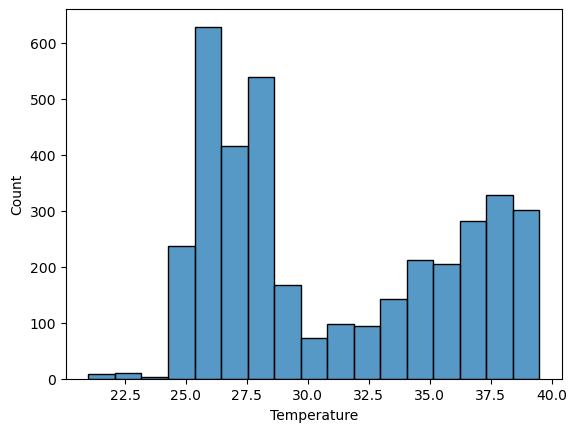

In [176]:
sns.histplot(data=data, x="Temperature")

<Axes: xlabel='Humidity', ylabel='Count'>

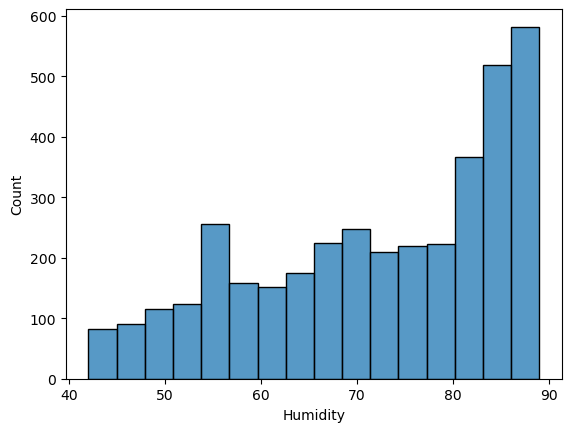

In [177]:
sns.histplot(data=data, x="Humidity")

<Axes: xlabel='RainDetector', ylabel='Count'>

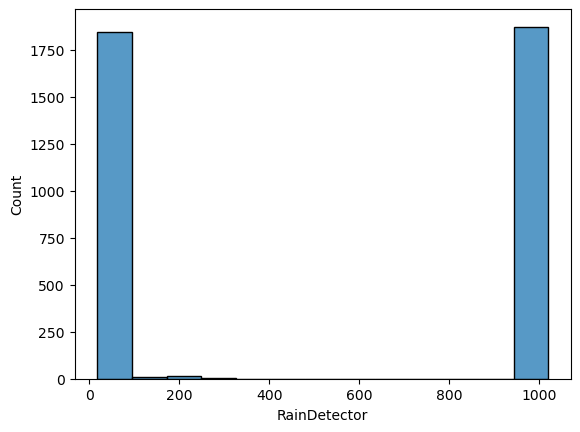

In [178]:
sns.histplot(data=data, x="RainDetector")

<Axes: xlabel='PhotoDiode', ylabel='Count'>

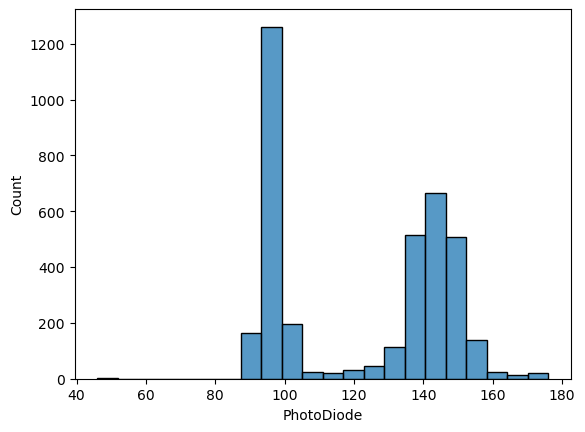

In [179]:
sns.histplot(data=data, x="PhotoDiode")

<Axes: xlabel='Temperature', ylabel='SoilMoisture'>

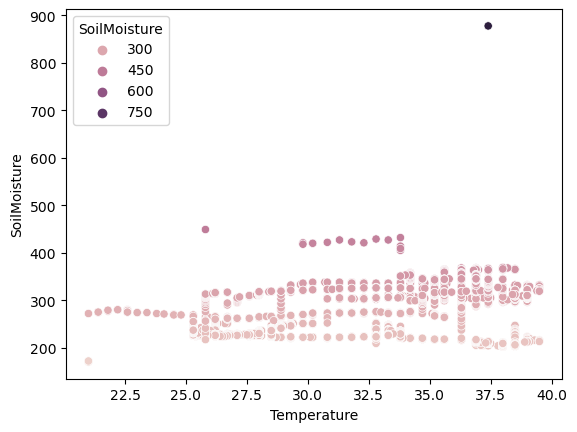

In [180]:
sns.scatterplot(data=data, x="Temperature", y="SoilMoisture",hue = "SoilMoisture")

<Axes: xlabel='Humidity', ylabel='SoilMoisture'>

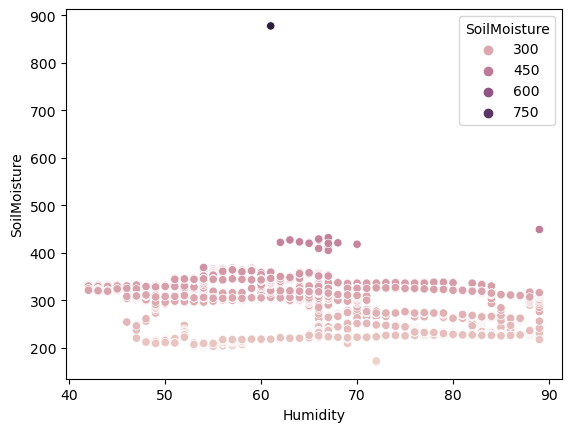

In [181]:
sns.scatterplot(data=data, x="Humidity", y="SoilMoisture",hue = "SoilMoisture")

<Axes: xlabel='RainDetector', ylabel='SoilMoisture'>

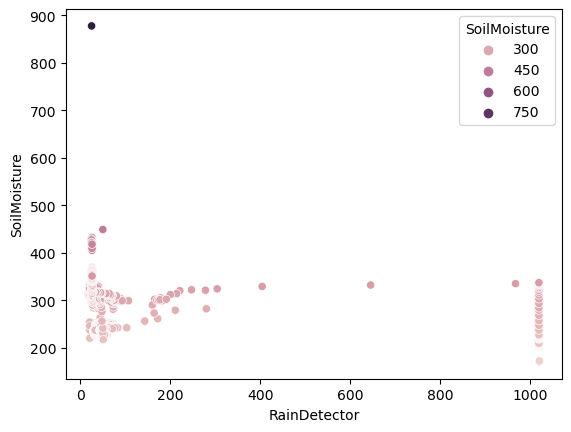

In [182]:
sns.scatterplot(data=data, x="RainDetector", y="SoilMoisture",hue = "SoilMoisture")

<Axes: xlabel='PhotoDiode', ylabel='SoilMoisture'>

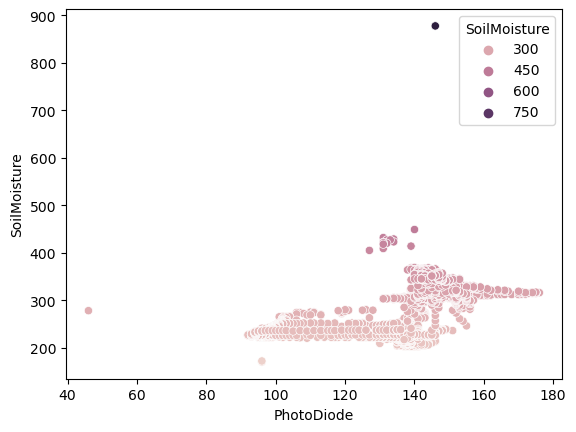

In [183]:
sns.scatterplot(data=data, x="PhotoDiode", y="SoilMoisture",hue = "SoilMoisture")

## Corelation Matrix

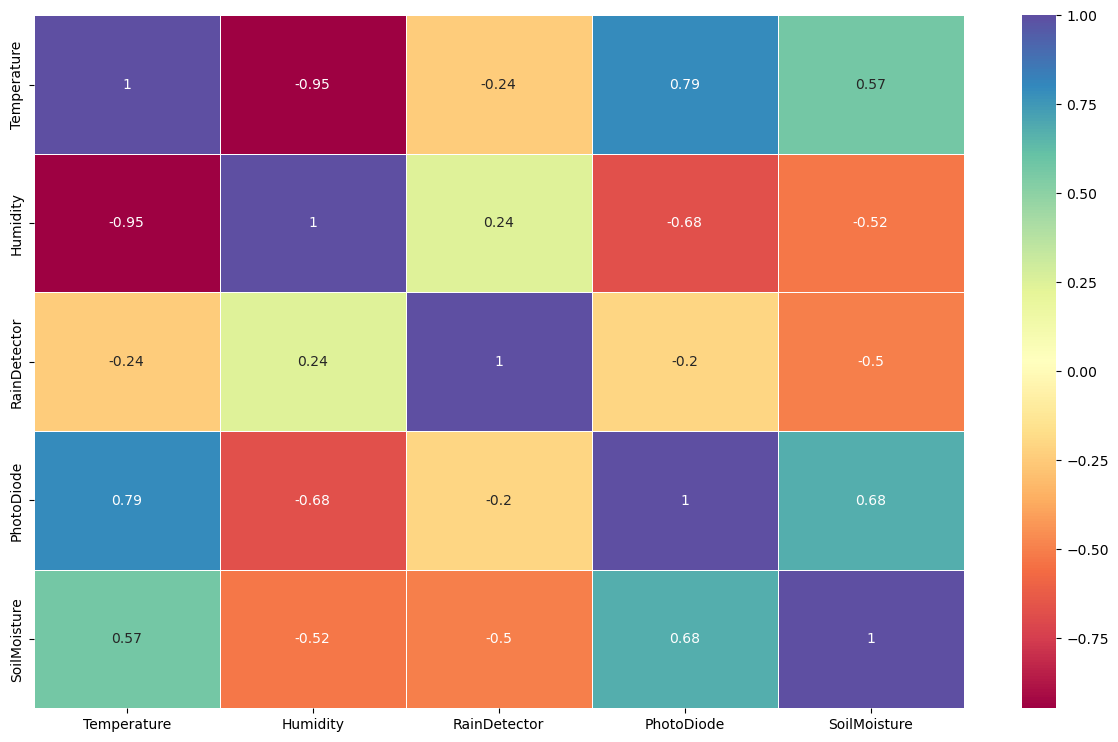

In [184]:
plt.figure(figsize = (15, 9))
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()


## Modelling

In [185]:
X = data.drop("SoilMoisture",axis = 1)
y = data["SoilMoisture"]


In [186]:
X

,Temperature,Humidity,RainDetector,PhotoDiode
0,21.0,72,1020,96
1,21.0,72,1020,96
2,21.0,72,1019,119
3,21.4,72,1019,119
4,21.4,72,1019,119
...,...,...,...,...
3741,30.8,62,25,131
3742,30.2,65,25,132
3743,30.2,67,26,131
3744,29.8,68,25,131


In [187]:
y

0       170
1       172
2       272
3       274
4       275
       ... 
3741    422
3742    420
3743    420
3744    421
3745    418
Name: SoilMoisture, Length: 3746, dtype: int64

## Linear Regression

In [188]:
from sklearn.model_selection import train_test_split


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [190]:
from sklearn.linear_model import LinearRegression


In [191]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [192]:
y_pred_li = reg.predict(X_test)

In [223]:
my_dict = {"Actual" : y_test, "Pred" : y_pred_li}
compare = pd.DataFrame(my_dict)

In [224]:
compare.head()

,Actual,Pred
3401,316,316.752213
1114,226,213.837157
351,264,264.359833
3731,351,309.878298
3438,335,306.458847


In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [226]:
def evaluation_metrics(actual, pred):
 MAE = mean_absolute_error(actual, pred)
 MSE = mean_squared_error(actual, pred)
 RMSE = np.sqrt(mean_squared_error(actual, pred))
 SCORE = r2_score(actual, pred)
 return print("r2_score:", SCORE, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)

In [227]:
evaluation_metrics(y_test, y_pred_li)

r2_score: 0.6194331329452384 
 mae: 23.225463839707313 
 mse: 849.9745902954558 
 rmse: 29.154323698131908


## Decision Tree

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
#regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [200]:
regr_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [201]:
y_pred_dt = regr_2.predict(X_test)

In [202]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [203]:
compare.head()

,Actual,Pred
3401,316,318.750643
1114,226,225.228728
351,264,262.881500
3731,351,355.189333
3438,335,334.284667


In [204]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [205]:
def evaluation_metrics(actual, pred):
 MAE = mean_absolute_error(actual, pred)
 MSE = mean_squared_error(actual, pred)
 RMSE = np.sqrt(mean_squared_error(actual, pred))
 SCORE = r2_score(actual, pred)
 return print("r2_score:", SCORE, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)

In [206]:
evaluation_metrics(y_test, y_pred_dt)

r2_score: 0.9132087957897519 
 mae: 8.094222171972168 
 mse: 193.8432497047614 
 rmse: 13.922760132414886


## KNN

In [207]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["Temperature","Humidity","PhotoDiode"])
)

X = data.drop("SoilMoisture", axis=1)
y = data["SoilMoisture"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

ct.fit(X_train)


X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [208]:
X_train.head()

,Temperature,Humidity,RainDetector,PhotoDiode
485,36.3,64,1019,142
2381,31.9,67,31,136
3299,34.2,70,37,151
2587,28.0,76,43,97
258,25.3,86,1020,113


In [209]:
X_train_normal[0:5]

array([[0.82702703, 0.46808511, 0.5952381 ],
       [0.58918919, 0.53191489, 0.52380952],
       [0.71351351, 0.59574468, 0.70238095],
       [0.37837838, 0.72340426, 0.05952381],
       [0.23243243, 0.93617021, 0.25      ]])

In [210]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_normal, y_train)

KNeighborsRegressor()

In [211]:
y_pred_kn = knn.predict(X_test_normal)

In [212]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [213]:
compare.head()

,Actual,Pred
3401,316,318.750643
1114,226,225.228728
351,264,262.881500
3731,351,355.189333
3438,335,334.284667


In [214]:
def evaluation_metrics(actual, pred):
 MAE = mean_absolute_error(actual, pred)
 MSE = mean_squared_error(actual, pred)
 RMSE = np.sqrt(mean_squared_error(actual, pred))
 SCORE = r2_score(actual, pred)
 return print("r2_score:", SCORE, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)

In [215]:
evaluation_metrics(y_test, y_pred_kn)

r2_score: 0.8471440884418994 
 mae: 6.445066666666666 
 mse: 341.39504 
 rmse: 18.476878524252953


## Random Forest

In [216]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [217]:
y_pred_rf = rf.predict(X_test)

In [218]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [219]:
compare.head()

,Actual,Pred
3401,316,318.750643
1114,226,225.228728
351,264,262.881500
3731,351,355.189333
3438,335,334.284667


In [220]:
def evaluation_metrics(actual, pred):
 MAE = mean_absolute_error(actual, pred)
 MSE = mean_squared_error(actual, pred)
 RMSE = np.sqrt(mean_squared_error(actual, pred))
 SCORE = r2_score(actual, pred)
 return print("r2_score:", SCORE, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)

In [221]:
evaluation_metrics(y_test, y_pred_rf)

r2_score: 0.9490530157259398 
 mae: 3.0302622503780587 
 mse: 113.78721016956561 
 rmse: 10.667108800868473


## Actual VS Predict

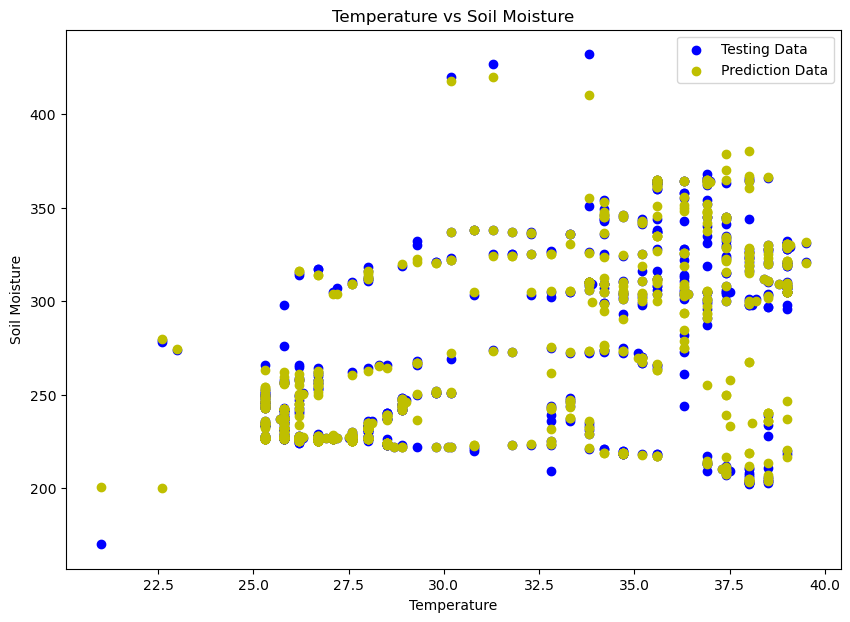

In [229]:
plt.figure(figsize=(10,7))
plt.scatter(X_test["Temperature"], y_test,c = 'b', label = "Testing Data")
plt.scatter(X_test["Temperature"], y_pred_rf, c = 'y', label = "Prediction Data")
plt.xlabel("Temperature")
plt.ylabel("Soil Moisture")
plt.title("Temperature vs Soil Moisture")
plt.legend();
     

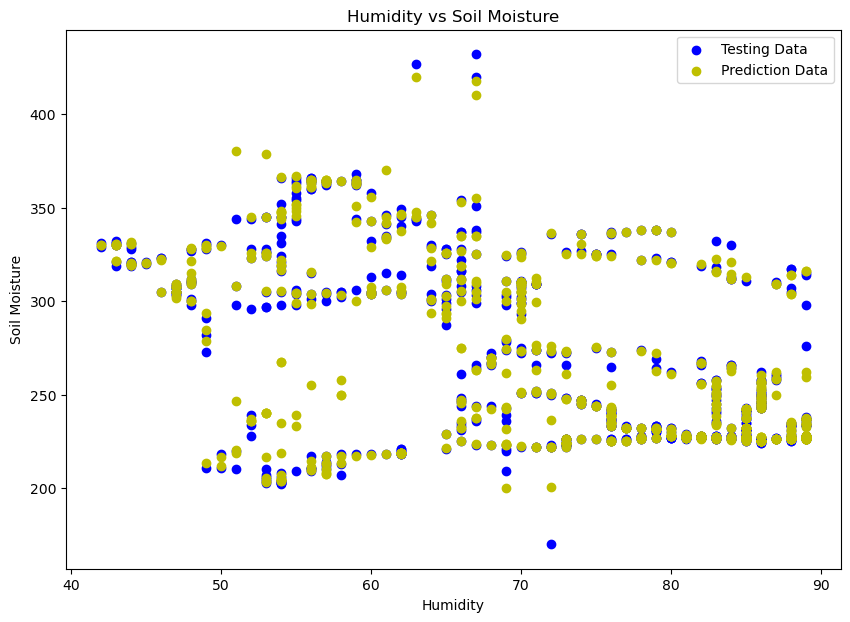

In [232]:
plt.figure(figsize=(10,7))
plt.scatter(X_test["Humidity"], y_test,c = 'b', label = "Testing Data")
plt.scatter(X_test["Humidity"], y_pred_rf, c = 'y', label = "Prediction Data")
plt.xlabel("Humidity")
plt.ylabel("Soil Moisture")
plt.title("Humidity vs Soil Moisture")
plt.legend();
     

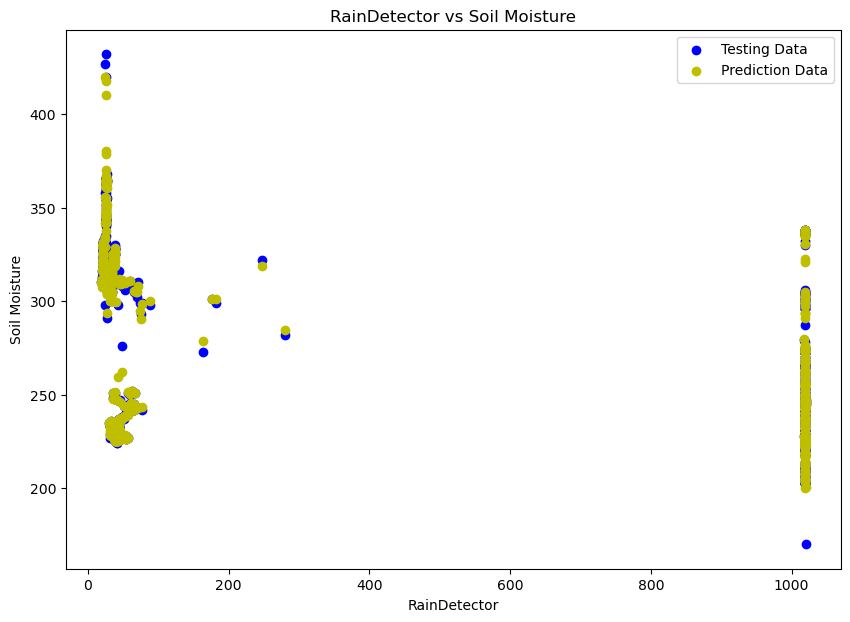

In [233]:
plt.figure(figsize=(10,7))
plt.scatter(X_test["RainDetector"], y_test,c = 'b', label = "Testing Data")
plt.scatter(X_test["RainDetector"], y_pred_rf, c = 'y', label = "Prediction Data")
plt.xlabel("RainDetector")
plt.ylabel("Soil Moisture")
plt.title("RainDetector vs Soil Moisture")
plt.legend();
     

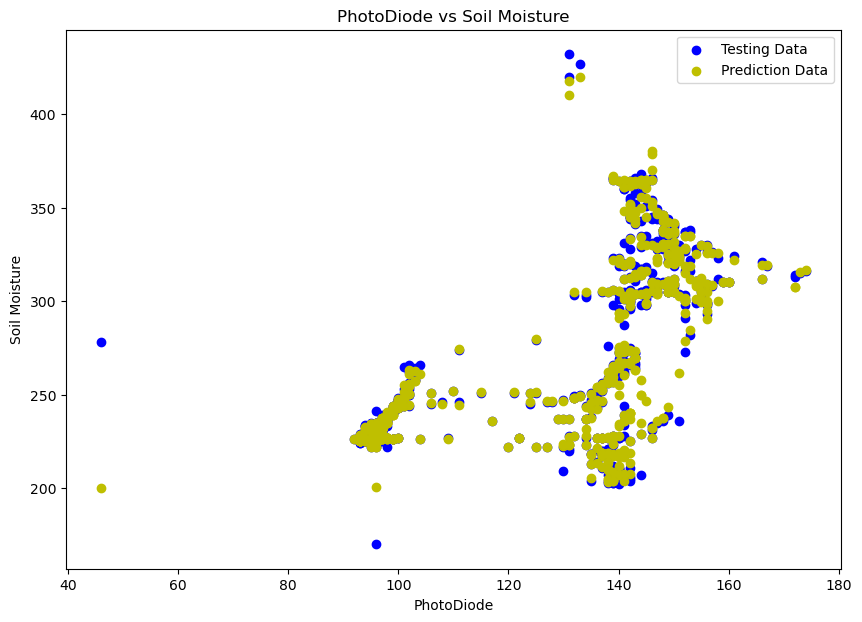

In [234]:
plt.figure(figsize=(10,7))
plt.scatter(X_test["PhotoDiode"], y_test,c = 'b', label = "Testing Data")
plt.scatter(X_test["PhotoDiode"], y_pred_rf, c = 'y', label = "Prediction Data")
plt.xlabel("PhotoDiode")
plt.ylabel("Soil Moisture")
plt.title("PhotoDiode vs Soil Moisture")
plt.legend();
     

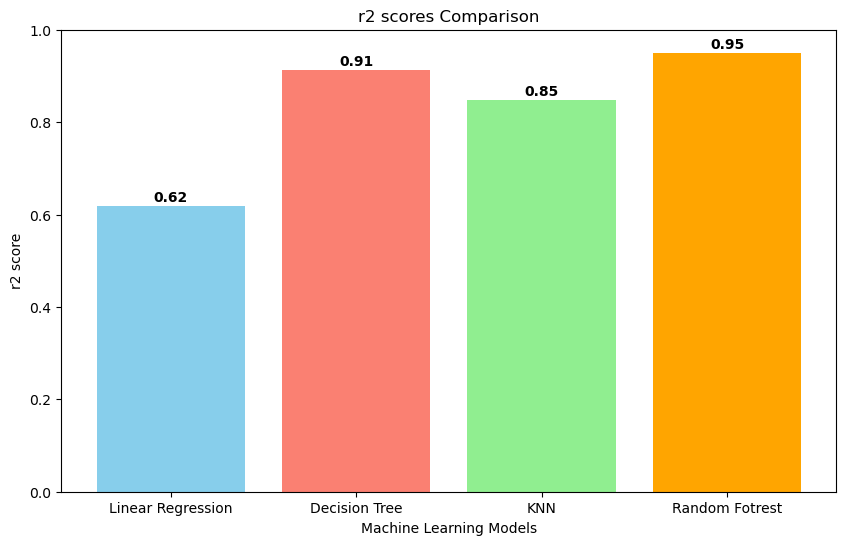

In [235]:
import matplotlib.pyplot as plt

# Example accuracy scores for different models
models = ['Linear Regression', 'Decision Tree', 'KNN', 'Random Fotrest']
accuracies = [0.619, 0.913, 0.847, 0.949]  # Replace with actual model accuracy scores

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.xlabel('Machine Learning Models')
plt.ylabel('r2 score')
plt.title('r2 scores Comparison')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Display the accuracy on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


## User Input

In [222]:
def predict_soil_moisture(temperature, humidity, rain_detector, light):
    # Arrange inputs in the format expected by the model
    inputs = np.array([[temperature, humidity, rain_detector, light]])
    prediction = rf.predict(inputs)
    return prediction[0]
temperature = float(input("Enter the temperature:"))
humidity = float(input("Enter the humidity:"))
rain_detector = float(input("Enter rainfall:"))
light = float(input("Enter light intensity:"))

soil_pred = predict_soil_moisture(temperature, humidity, rain_detector, light)
print("Soil moisture :",soil_pred)

Enter the temperature:10
Enter the humidity:25
Enter rainfall:40
Enter light intensity:10
Soil moisture : 213.9575909090909
